In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv('/home/inshad/Downloads/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### The data type of total charges is object while it is a numerical column, so we have to convert it into numerical column. 
### And it seems like an character or multiple character are present in it.So we will replace all non- numerical values with ' ' and then later replace it with np.nan

In [4]:
df['TotalCharges'] = df['TotalCharges'].str.replace('\W','',regex=True)

In [5]:
df['TotalCharges']=df['TotalCharges'].replace('',np.nan)

In [6]:
# converting the 'total charges' to numeric
df['TotalCharges']=df['TotalCharges'].apply(pd.to_numeric)

In [7]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [8]:
df.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [9]:
print("mean:",df['TotalCharges'].mean())
print("median:",df['TotalCharges'].median())
print("mode:",df['TotalCharges'].mode())

mean: 126251.90841865756
median: 36769.0
mode: 0    202.0
dtype: float64


<AxesSubplot:xlabel='TotalCharges'>

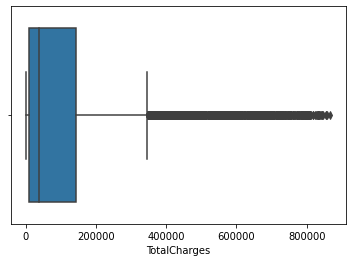

In [10]:
sns.boxplot(x=df['TotalCharges'],data=df)

In [11]:
len(df[df['TotalCharges']<36769])

3516

In [12]:
# The dataset have very extensive outliers, so we will replace missing values with median(around 36000)
df['TotalCharges'].fillna(value=df['TotalCharges'].median(),inplace=True)

In [13]:
df['TotalCharges'].isna().sum()

0

### From the primary anlaysis all the columns seems relevant except 'customer id' so  we will drop it.
### For the rest of the columns we label encode the columns and find correlation, then decide whether to drop or not.

In [14]:
df.drop('customerID',axis=1,inplace=True)

In [15]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,2985.0,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,18895.0,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,10815.0,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,184075.0,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,15165.0,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,19905.0,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,73629.0,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,34645.0,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,3066.0,Yes


In [16]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

### Most of the columns have yes or no values so we will directly Label encode them. For the other columns we will check the value counts.

In [17]:
for i in ['MultipleLines','InternetService','Contract','PaymentMethod']:
    print(df[i].value_counts())

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64
Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64
Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64
Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64


In [18]:
df.groupby('PaymentMethod')['TotalCharges'].mean().sort_values(ascending=False)

PaymentMethod
Bank transfer (automatic)    171491.021373
Credit card (automatic)      165116.934297
Electronic check             117298.687526
Mailed check                  58750.851117
Name: TotalCharges, dtype: float64

## Visualizations

<AxesSubplot:ylabel='Contract'>

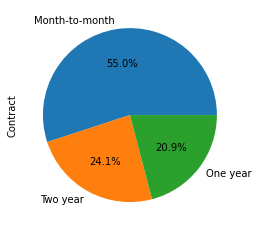

In [19]:
# diff types of contract
df['Contract'].value_counts().plot(kind='pie',autopct='%1.1f%%')

<AxesSubplot:xlabel='Contract', ylabel='TotalCharges'>

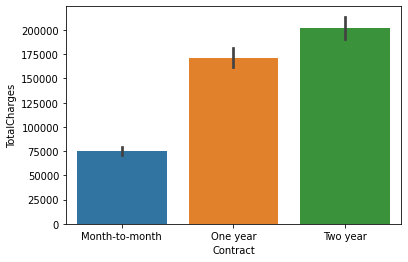

In [20]:
# contract type contributing more to the total charges
sns.barplot(x=df['Contract'],y=df['TotalCharges'],data=df)

<AxesSubplot:xlabel='MultipleLines', ylabel='TotalCharges'>

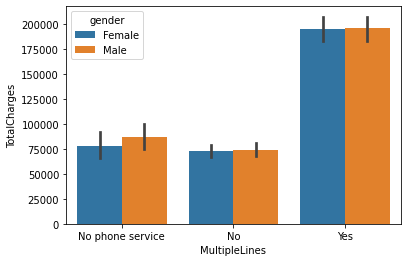

In [21]:
# people having multiple lines are contributing more to the total charges
sns.barplot(x=df['MultipleLines'],y=df['TotalCharges'],data=df,hue='gender')

<AxesSubplot:xlabel='tenure', ylabel='TotalCharges'>

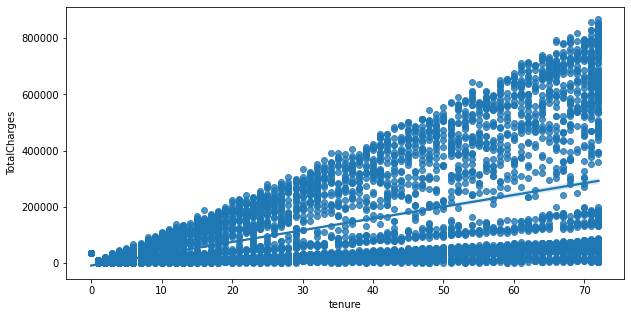

In [22]:
# with increase in the tenure there is increase in TotalCharges
plt.figure(figsize=(10,5))
sns.regplot(x=df['tenure'],y=df['TotalCharges'],data=df)

### Label encoding the data set except numerical columns.

In [23]:
for i  in ['gender', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']:
    from sklearn.preprocessing import LabelEncoder
    le = LabelEncoder()
    df[i]=le.fit_transform(df[i])
df    

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,2985.0,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,18895.0,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,10815.0,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,184075.0,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,15165.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,19905.0,0
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,73629.0,0
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,34645.0,0
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,3066.0,1


In [24]:
df.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.504756,0.162147,0.483033,0.299588,32.371149,0.903166,0.940508,0.872923,0.790004,0.906432,0.904444,0.797104,0.985376,0.992475,0.690473,0.592219,1.574329,64.761692,126112.150930,0.265370
std,0.500013,0.368612,0.499748,0.458110,24.559481,0.295752,0.948554,0.737796,0.859848,0.880162,0.879949,0.861551,0.885002,0.885091,0.833755,0.491457,1.068104,30.090047,192405.057371,0.441561
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,19.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,35.500000,7580.500000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,70.350000,36769.000000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,89.850000,142715.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,118.750000,867245.000000,1.000000


In [25]:
df.corr()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
gender,1.000000,-0.001874,-0.001808,0.010517,0.005106,-0.006488,-0.006739,-0.000863,-0.015017,-0.012057,0.000549,-0.006825,-0.006421,-0.008743,0.000126,-0.011754,0.017352,-0.014569,0.002091,-0.008612
SeniorCitizen,-0.001874,1.000000,0.016479,-0.211185,0.016567,0.008576,0.146185,-0.032310,-0.128221,-0.013632,-0.021398,-0.151268,0.030776,0.047266,-0.142554,0.156530,-0.038551,0.220173,0.091066,0.150889
Partner,-0.001808,0.016479,1.000000,0.452676,0.379697,0.017706,0.142410,0.000891,0.150828,0.153130,0.166330,0.126733,0.137341,0.129574,0.294806,-0.014877,-0.154798,0.096848,0.201766,-0.150448
Dependents,0.010517,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.024991,0.044590,0.152166,0.091015,0.080537,0.133524,0.046885,0.021321,0.243187,-0.111377,-0.040292,-0.113890,0.043723,-0.164221
tenure,0.005106,0.016567,0.379697,0.159712,1.000000,0.008448,0.343032,-0.030359,0.325468,0.370876,0.371105,0.322942,0.289373,0.296866,0.671607,0.006152,-0.370436,0.247900,0.534920,-0.352229
PhoneService,-0.006488,0.008576,0.017706,-0.001762,0.008448,1.000000,-0.020538,0.387436,-0.015198,0.024105,0.003727,-0.019158,0.055353,0.043870,0.002247,0.016505,-0.004184,0.247398,0.073512,0.011942
MultipleLines,-0.006739,0.146185,0.142410,-0.024991,0.343032,-0.020538,1.000000,-0.109216,0.007141,0.117327,0.122318,0.011466,0.175059,0.180957,0.110842,0.165146,-0.176793,0.433576,0.299457,0.038037
InternetService,-0.000863,-0.032310,0.000891,0.044590,-0.030359,0.387436,-0.109216,1.000000,-0.028416,0.036138,0.044944,-0.026047,0.107417,0.098350,0.099721,-0.138625,0.086140,-0.323260,-0.115772,-0.047291
OnlineSecurity,-0.015017,-0.128221,0.150828,0.152166,0.325468,-0.015198,0.007141,-0.028416,1.000000,0.185126,0.175985,0.285028,0.044669,0.055954,0.374416,-0.157641,-0.096726,-0.053878,0.165065,-0.289309
OnlineBackup,-0.012057,-0.013632,0.153130,0.091015,0.370876,0.024105,0.117327,0.036138,0.185126,1.000000,0.187757,0.195748,0.147186,0.136722,0.280980,-0.013370,-0.124847,0.119777,0.252791,-0.195525


## Machine Learning

In [26]:
X = df.drop('Churn',axis=1).values
y = df['Churn'].values

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [29]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Support Vector Machine

In [30]:
from sklearn.svm  import SVC
svc_model = SVC()
svc_model.fit(X_train,y_train)

SVC()

In [31]:
y_pred = svc_model.predict(X_test)

In [32]:
from sklearn.metrics import classification_report,ConfusionMatrixDisplay

In [33]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.92      0.87      1697
           1       0.70      0.50      0.58       628

    accuracy                           0.81      2325
   macro avg       0.77      0.71      0.73      2325
weighted avg       0.80      0.81      0.80      2325



## Naive Bayes

In [34]:
from sklearn.naive_bayes import GaussianNB
naive_model = GaussianNB()
naive_model.fit(X_train,y_train)

GaussianNB()

In [35]:
naive_pred = naive_model.predict(X_test)

In [36]:
print(classification_report(naive_pred,y_test))

              precision    recall  f1-score   support

           0       0.75      0.90      0.82      1410
           1       0.78      0.53      0.63       915

    accuracy                           0.76      2325
   macro avg       0.76      0.72      0.72      2325
weighted avg       0.76      0.76      0.74      2325



## K-Neighbours classifier

In [37]:
from sklearn.neighbors import KNeighborsClassifier
knnmodel = KNeighborsClassifier()
knnmodel.fit(X_train,y_train)

KNeighborsClassifier()

In [38]:
knn_pred = knnmodel.predict(X_test)

In [39]:
print(classification_report(knn_pred,y_test))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83      1697
           1       0.54      0.54      0.54       628

    accuracy                           0.75      2325
   macro avg       0.69      0.69      0.69      2325
weighted avg       0.75      0.75      0.75      2325



## Logistic Regression

In [40]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()
lg.fit(X_train,y_train)

LogisticRegression()

In [41]:
lg_pred = lg.predict(X_test)

In [42]:
print(classification_report(lg_pred,y_test))

              precision    recall  f1-score   support

           0       0.90      0.85      0.88      1786
           1       0.59      0.68      0.63       539

    accuracy                           0.82      2325
   macro avg       0.74      0.77      0.75      2325
weighted avg       0.83      0.82      0.82      2325



## Decision Tree

In [43]:
from sklearn.tree import DecisionTreeClassifier
tree_model = DecisionTreeClassifier(criterion='entropy')
tree_model.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [44]:
tree_pred = tree_model.predict(X_test)

In [45]:
print(classification_report(y_test,tree_pred))

              precision    recall  f1-score   support

           0       0.82      0.82      0.82      1697
           1       0.51      0.51      0.51       628

    accuracy                           0.74      2325
   macro avg       0.67      0.67      0.67      2325
weighted avg       0.74      0.74      0.74      2325



## Random Forest

In [46]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train,y_train)

RandomForestClassifier()

In [47]:
rf_pred = rf_model.predict(X_test)

In [48]:
print(classification_report(y_test,rf_pred))

              precision    recall  f1-score   support

           0       0.83      0.90      0.87      1697
           1       0.66      0.51      0.57       628

    accuracy                           0.80      2325
   macro avg       0.74      0.71      0.72      2325
weighted avg       0.78      0.80      0.79      2325



### Our data set is an imbalanced data set ,so we will apply SMOTE (oversampling only) to check whether our model performs better.

In [49]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
Xo,yo = smote.fit_resample(X,y)

## Support Vector Machine using SMOTE

In [50]:
X_train, X_test, y_train, y_test = train_test_split(Xo, yo, test_size=0.33, random_state=42)

In [51]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [52]:
from sklearn.svm  import SVC
svc_model = SVC()
svc_model.fit(X_train,y_train)

SVC()

In [53]:
y_pred_os = svc_model.predict(X_test)

In [54]:
print(classification_report(y_test,y_pred_os))

              precision    recall  f1-score   support

           0       0.84      0.85      0.85      1730
           1       0.85      0.84      0.84      1685

    accuracy                           0.84      3415
   macro avg       0.84      0.84      0.84      3415
weighted avg       0.84      0.84      0.84      3415



## Naive Bayes using SMOTE

In [55]:
from sklearn.naive_bayes import GaussianNB
naive_model = GaussianNB()
naive_model.fit(X_train,y_train)

GaussianNB()

In [56]:
naive_pred_os = naive_model.predict(X_test)

In [57]:
print(classification_report(naive_pred_os,y_test))

              precision    recall  f1-score   support

           0       0.76      0.80      0.78      1643
           1       0.80      0.76      0.78      1772

    accuracy                           0.78      3415
   macro avg       0.78      0.78      0.78      3415
weighted avg       0.78      0.78      0.78      3415



## K-Neighbours classifier using SMOTE

In [58]:
from sklearn.neighbors import KNeighborsClassifier
knnmodel = KNeighborsClassifier()
knnmodel.fit(X_train,y_train)

KNeighborsClassifier()

In [59]:
knn_pred_os = knnmodel.predict(X_test)

In [60]:
print(classification_report(knn_pred_os,y_test))

              precision    recall  f1-score   support

           0       0.70      0.87      0.78      1405
           1       0.89      0.74      0.81      2010

    accuracy                           0.79      3415
   macro avg       0.80      0.80      0.79      3415
weighted avg       0.81      0.79      0.80      3415



## Logistic Regression using SMOTE

In [61]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()
lg.fit(X_train,y_train)

LogisticRegression()

In [62]:
lg_pred_os = lg.predict(X_test)

In [63]:
print(classification_report(lg_pred_os,y_test))

              precision    recall  f1-score   support

           0       0.75      0.81      0.77      1600
           1       0.82      0.76      0.79      1815

    accuracy                           0.78      3415
   macro avg       0.78      0.78      0.78      3415
weighted avg       0.78      0.78      0.78      3415



## Decision Tree using SMOTE

In [64]:
from sklearn.tree import DecisionTreeClassifier
tree_model = DecisionTreeClassifier(criterion='entropy')
tree_model.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [65]:
tree_pred_os = tree_model.predict(X_test)

In [66]:
print(classification_report(tree_pred_os,y_test))

              precision    recall  f1-score   support

           0       0.82      0.81      0.82      1740
           1       0.81      0.81      0.81      1675

    accuracy                           0.81      3415
   macro avg       0.81      0.81      0.81      3415
weighted avg       0.81      0.81      0.81      3415



##  Random Forest using SMOTE

In [67]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train,y_train)

RandomForestClassifier()

In [68]:
rf_pred_os = rf_model.predict(X_test)

In [69]:
print(classification_report(y_test,rf_pred_os))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1730
           1       0.89      0.82      0.85      1685

    accuracy                           0.86      3415
   macro avg       0.86      0.86      0.86      3415
weighted avg       0.86      0.86      0.86      3415



In [70]:
# Dataframe of our ML model of various algorithms with and without smote

In [71]:
overview = pd.DataFrame({
    "Algorithms":['SVM','Naive_Bayes','KNN','Logistic_Regression','Decision_tree','Random_Forest'],
    "Accuracy":[0.81,0.76,0.75,0.82,0.73,0.80],
    "Accuracy_SMOTE":[0.84,0.78,0.79,0.79,0.82,0.87]
})

In [72]:
overview

,Algorithms,Accuracy,Accuracy_SMOTE
0,SVM,0.81,0.84
1,Naive_Bayes,0.76,0.78
2,KNN,0.75,0.79
3,Logistic_Regression,0.82,0.79
4,Decision_tree,0.73,0.82
5,Random_Forest,0.80,0.87


### When SMOTE is applied our model performs much better than our actual model.
### Among that Random Forest classifier performs well with an accuracy score of 0.87. Also Random forest using smote have much better f1 score and recall score